### Create the prediction model

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 1. Import the dataset

In [2]:
df = pd.read_csv('../data/analysis_set.csv')

In [3]:
df.head()

,id,gps_height,construction_year,amount_tsh,population,basin,extraction_type_class,management_group,payment_type,quality_group,quantity,source_class,waterpoint_type_group,status_group
0,69572,1390,1999,6000.0,109,Lake Nyasa,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional
1,34310,686,2009,25.0,250,Pangani,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional
2,50409,1062,1987,200.0,250,Lake Nyasa,handpump,user-group,on failure,good,insufficient,groundwater,hand pump,functional
3,48451,1703,1978,500.0,35,Rufiji,gravity,user-group,monthly,good,dry,surface,communal standpipe,non functional
4,18274,1763,1992,500.0,1,Lake Nyasa,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16192 entries, 0 to 16191
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16192 non-null  int64  
 1   gps_height             16192 non-null  int64  
 2   construction_year      16192 non-null  int64  
 3   amount_tsh             16192 non-null  float64
 4   population             16192 non-null  int64  
 5   basin                  16192 non-null  object 
 6   extraction_type_class  16192 non-null  object 
 7   management_group       16192 non-null  object 
 8   payment_type           16192 non-null  object 
 9   quality_group          16192 non-null  object 
 10  quantity               16192 non-null  object 
 11  source_class           16192 non-null  object 
 12  waterpoint_type_group  16192 non-null  object 
 13  status_group           16192 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.7+ 

#### 2. Create train and testset

In [7]:
df.columns

Index(['id', 'gps_height', 'construction_year', 'amount_tsh', 'population', 'basin', 'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity', 'source_class', 'waterpoint_type_group', 'status_group'], dtype='object')

In [25]:
X = df[['gps_height', 'construction_year', 'amount_tsh', 'population',
       'basin', 'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_class', 'waterpoint_type_group']]
y = df[['status_group']]

X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

#### 3. Transform categorical variables to dummies and scale the numerical variables

In [26]:
#select the categorical data for the train and testset
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat = X_train_cat.astype('category')

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat = X_test_cat.astype('category')

#select numerical datasets for both train and test
X_train_nr = X_train[['gps_height', 'construction_year', 'amount_tsh', 'population']]
X_test_nr = X_test[['gps_height', 'construction_year', 'amount_tsh', 'population']]

In [27]:
#encode the category variables for traindata
encoder = OneHotEncoder(handle_unknown="ignore", 
                        sparse=False)

encoder.fit(X_train_cat)

X_train_cat = pd.DataFrame(encoder.transform(X_train_cat), 
                           index=X_train.index)

/Users/nellekesmits/Documents/projects/poc.pump-it-up/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
# rename col names traindata
X_train_cat.columns = encoder.get_feature_names_out(['basin', 'extraction_type_class', 'management_group', 
                                                 'payment_type','quality_group', 'quantity', 'source_class', 'waterpoint_type_group'])

In [29]:
X_train_cat.head()

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
6423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8055,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
534,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8026,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
#merge categorie dummies with original set for train data
X_train = pd.concat([X_train,X_train_cat],axis=1)

#drop the original col with categories
X_train = X_train.drop(columns=['basin', 'extraction_type_class', 'management_group', 'payment_type','quality_group', 'quantity', 
                                 'source_class', 'waterpoint_type_group'])

In [31]:
#transform testdata with the set steps (use encoder - rename columns - add to original data base on index - drop old columns)

X_test_cat = pd.DataFrame(encoder.transform(X_test_cat), 
                          index=X_test.index)

X_test_cat.columns = encoder.get_feature_names_out(['basin', 'extraction_type_class', 'management_group', 
                                                 'payment_type','quality_group', 'quantity', 'source_class', 'waterpoint_type_group'])
X_test = pd.concat([X_test,
                    X_test_cat],axis=1)

X_test = X_test.drop(columns=['basin', 'extraction_type_class', 'management_group', 'payment_type','quality_group', 'quantity', 
                                 'source_class', 'waterpoint_type_group'])

In [35]:
## scale numerical variables of the train set

scale = StandardScaler()
scale.fit(X_train_nr)

X_train_nr = pd.DataFrame(scale.transform(X_train_nr), index=X_train.index)

X_train_nr.columns = ['gps_height', 'construction_year', 'amount_tsh', 'population']

X_train = X_train.drop(columns=['gps_height', 'construction_year', 'amount_tsh', 'population'])
X_train = pd.concat([X_train,X_train_nr],axis=1)
X_train.head()

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,gps_height,construction_year,amount_tsh,population
6423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.620153,0.636487,-0.088210,-0.495258
8138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.022464,-2.394253,-0.173746,-0.425676
8055,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.524306,-1.324580,0.713695,-0.495258
534,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.504476,-0.789744,-0.088210,0.537771
8026,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.095175,0.993044,0.000891,-0.495258


In [37]:
## scale numerical variables of the test set
X_test_nr = pd.DataFrame(scale.transform(X_test_nr), index=X_test.index)
X_test_nr.columns = ['gps_height', 'construction_year', 'amount_tsh', 'population']
X_test = X_test.drop(columns=['gps_height', 'construction_year', 'amount_tsh', 'population'])
X_test = pd.concat([X_test,X_test_nr],axis=1)
X_test.head()

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,gps_height,construction_year,amount_tsh,population
15479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.985829,-1.339947,-0.237561,0.573305
10438,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.177594,0.270841,0.216269,0.326412
11935,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.265793,-1.697899,-0.243379,-0.243342
14630,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.608980,0.718282,-0.244543,0.174478
11559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.667860,1.076234,0.030082,0.326412


In [38]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
basin_Internal,3239.0,9.941340e-02,0.299262,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Lake Nyasa,3239.0,4.692806e-02,0.211517,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Lake Rukwa,3239.0,2.469898e-02,0.155230,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Lake Tanganyika,3239.0,1.170114e-01,0.321484,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Lake Victoria,3239.0,2.686014e-02,0.161700,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Pangani,3239.0,2.046928e-01,0.403539,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Rufiji,3239.0,2.154986e-01,0.411231,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Ruvuma / Southern Coast,3239.0,1.086755e-01,0.311280,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Wami / Ruvu,3239.0,1.562211e-01,0.363121,0.000000,0.000000,0.000000,0.000000,1.000000
extraction_type_class_gravity,3239.0,5.192961e-01,0.499705,0.000000,0.000000,1.000000,1.000000,1.000000


#### 4. Try different machine learning models

In [40]:
# fit model
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# check scores
print('De accuracy score op de trainset is:')
print(neigh.score(X_train,y_train).round(2))
print('')
print('De accuracy score op de testset is:')
print(neigh.score(X_test,y_test).round(2))

/Users/nellekesmits/Documents/projects/poc.pump-it-up/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nellekesmits/Documents/projects/poc.pump-it-up/venv/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


De accuracy score op de trainset is:
0.87

De accuracy score op de testset is:
0.77


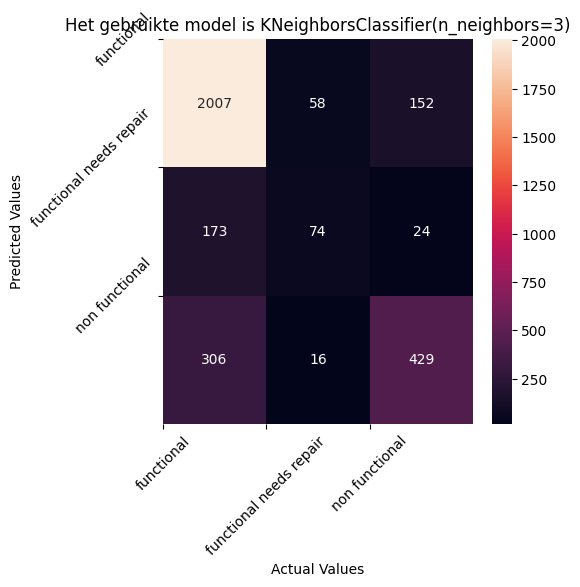

In [56]:
# check confusion matrix for the model
y_pred = neigh.predict(X_test)
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# plot figure
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True,fmt='g')
plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels, rotation=45)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Het gebruikte model is {}'.format(neigh))
plt.show()

In [41]:
# fit model
svm = SVC(kernel='rbf', gamma=1, C=2)
svm.fit(X_train, y_train)

# check scores
print('De accuracy score op de trainset is:')
print(svm.score(X_train,y_train).round(2))
print('')
print('De accuracy score op de testset is:')
print(svm.score(X_test,y_test).round(2))

/Users/nellekesmits/Documents/projects/poc.pump-it-up/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


De accuracy score op de trainset is:
0.86

De accuracy score op de testset is:
0.77


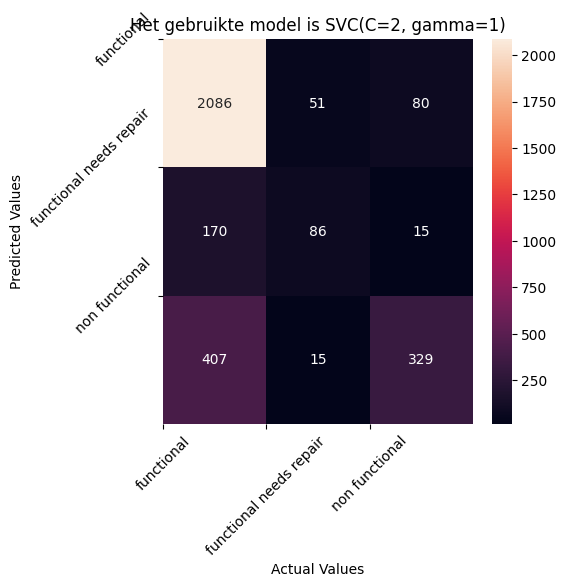

In [57]:
# check confusion matrix for the model
y_pred = svm.predict(X_test)
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# plot figure
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True,fmt='g')
plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels, rotation=45)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Het gebruikte model is {}'.format(svm))
plt.show()

In [59]:
# fit model
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)

# check scores
print('De accuracy score op de trainset is:')
print(rf.score(X_train,y_train).round(2))
print('')
print('De accuracy score op de testset is:')
print(rf.score(X_test,y_test).round(2))

/Users/nellekesmits/Documents/projects/poc.pump-it-up/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


De accuracy score op de trainset is:
0.99

De accuracy score op de testset is:
0.76


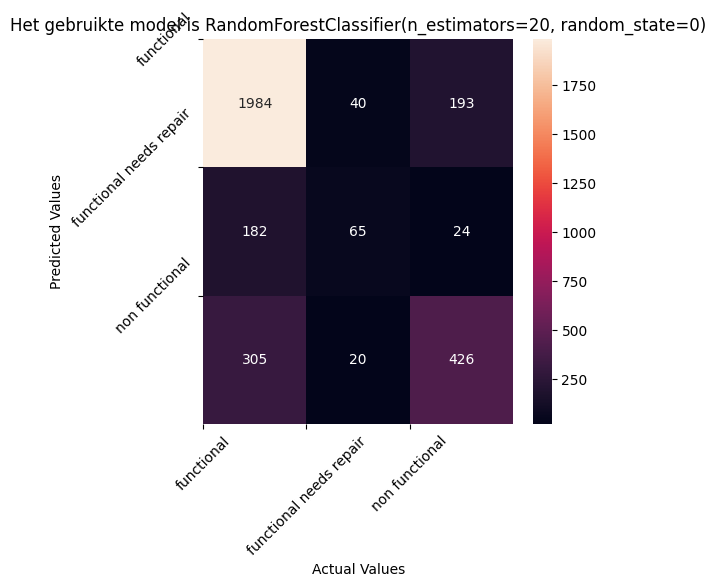

In [58]:
# check confusion matrix for the model
y_pred = rf.predict(X_test)
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# plot figure
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True,fmt='g')
plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels, rotation=45)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Het gebruikte model is {}'.format(rf))
plt.show()

In [ ]:
## First conclusions

# overfitten van randomforest (for now)
# the others need further investigation to check hypterparameters and do some grid searching.
# also: what is most important, recall or precision? and for which class? Check the relevant metrics and optimize based on the business needs